In [59]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def encontra_L(f, C):
    # Retorna L (µ𝐻)
    return (1/((2*pi*f)**2*C))*1e6

C = 0.47e-6
f = 30000
L = encontra_L(f, C)
print(f'L escolhido {L:.2f} µ𝐻 ')

L escolhido 59.88 µ𝐻 


In [61]:
#implemente seu código aqui
C1 = C2 = C
L1 = 67.45e-6
L2 = 67.13e-6
V = 9
Kr = 1.13
R1 = 353.0e-3 + Kr
R2 = 377.7e-3 + Kr
Rc = 10.4 

w = 2*pi*f
M = sqrt(L1*L2)
XL1 = L1*w*1j
XL2 = L2*w*1j
XM = M*w*1j

XC1 = 1/(C1*w*1j)
XC2 = 1/(C2*w*1j)

In [62]:
def CalcularTransformador(v1, Rc, XM) -> tuple[complex, complex]:
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+Rc/((Rc/XC2)+1)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

i1, i2 = CalcularTransformador((2/pi)*V, 10, XM)
print(i1)
print(i2)

(0.2856241221888787+0.23624757056351298j)
(0.05974386633976589+0.4448964090574032j)


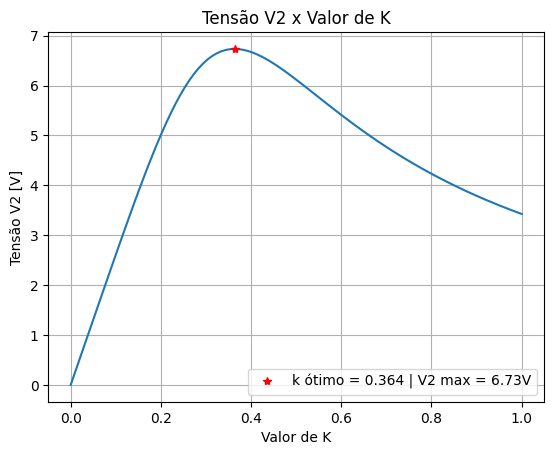

V2 de pico 6.73 V


In [63]:
# Melhor K

lista_k = np.linspace(0,1,100)
lista_V2 = []

for k in lista_k:
    novo_XM = k*XM
    i1, i2 = CalcularTransformador((2/pi)*V, Rc, novo_XM)
    i4 = i2/((Rc/XC2)+1)
    lista_V2.append(abs(Rc*i4))
pico_idx = lista_V2.index(max(lista_V2))
k_top = lista_k[pico_idx]
plt.plot(lista_k, lista_V2)
plt.plot(k_top, max(lista_V2), '*r',label=f'k ótimo = {k_top:.3f} | V2 max = {max(lista_V2):.2f}V')
plt.legend()
plt.xlabel('Valor de K')
plt.ylabel('Tensão V2 [V]')
plt.title('Tensão V2 x Valor de K')
plt.grid()
plt.show()

print(f'V2 de pico {lista_V2[pico_idx]:.2f} V')


In [66]:
V2_real = 6.7/sqrt(2)
P = (V2_real**2)/Rc
print(f'Potência Trsnmitida: {P.real:.2f} W')

Potência Trsnmitida: 2.16 W
